# **Manipulating Images One Pixel At a Time**

# Summarise
1. Cropping
2. Changing Image Pixels

# **I./ CROPPING**

## Pillow (pil) & OpenCV (cv2)

In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
direc = os.getcwd()
iname2 = "image_2.jpg"
image2 = f"{direc}/Image_Storage/{iname2}"

In [4]:
nami_obj = Image.open(image2)
nami_pil = np.array(nami_obj)

nami_cv2 = cv2.imread(image2)

In [5]:
nami_pil.shape

(715, 736, 3)

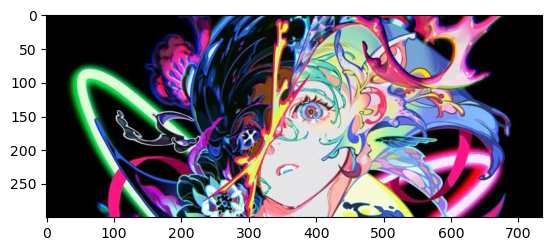

In [6]:
upper = 150
lower = 450
crop_top = nami_pil[upper:lower, :, :]

plt.imshow(crop_top)

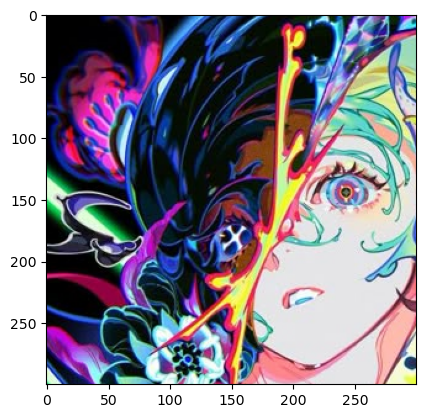

In [7]:
left = 150
right = 450

crop_horizontal = crop_top[:,left:right,:]
plt.imshow(crop_horizontal)

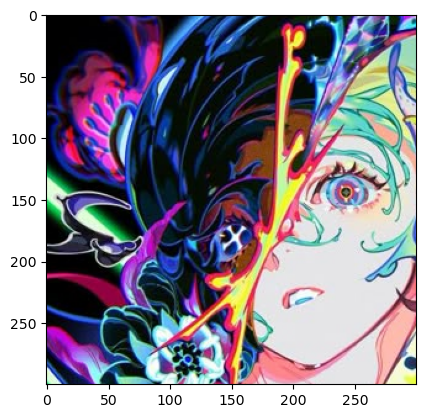

In [8]:
# Using crop() function with Pillow

crop_nami = nami_obj.crop((left, upper, right, lower))
plt.imshow(crop_nami)

# **II./ Changing Image Pixels**

### Creating a NumPy array filled with zeros (Black Image)

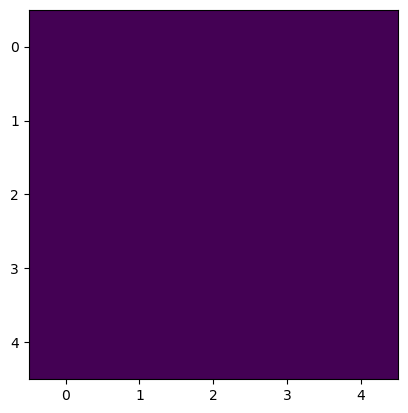

In [31]:
H = 5
W = 5
C = 3

irgb = np.zeros((H, W, C), dtype=np.uint8)

gray = np.zeros((H, W), dtype=np.uint8)

blank = np.zeros_like(crop_nami)

white = np.ones((H, W, C), dtype=np.uint8) * 255
# This is not using zeros() because which multiply with Zero equal Zero

# =====
plt.imshow(gray)
# plt.axis("off")
# =====
# cv2.imshow("blank", gray)
# cv2.waitKey(0)
# 2 lines above should come together

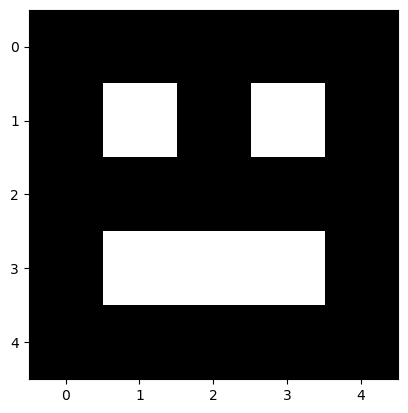

In [34]:
irgb[1, 1:2] = 255
irgb[1, 3:4] = 255
irgb[3, 1:4] = 255
plt.imshow(irgb)

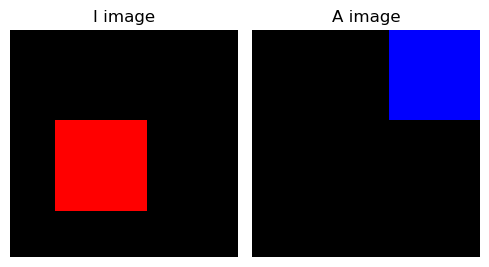

In [61]:
irgb[:] = 0
irgb[2:4, 1:3, 0] = 255
I = irgb.copy()

irgb[:] = 0
irgb[0:2, 3:5, 2] = 255
A = irgb.copy()

fig, axes = plt.subplots(1, 2, figsize=(5, 5))

axes[0].imshow(I)
axes[0].set_title("I image")
axes[0].axis("off")

axes[1].imshow(A)
axes[1].set_title("A image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

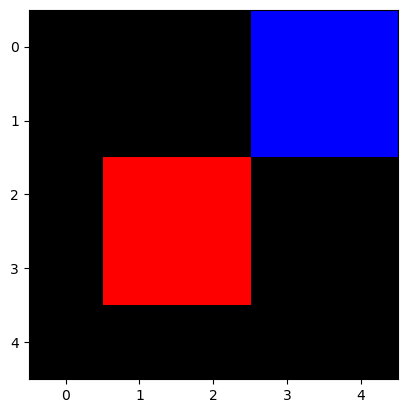

In [58]:
I[0:2, 3:5, :] = A[0:2, 3:5, :]
plt.imshow(I)

## ImageDraw Module

1. Draw a shape
2. Insert a font

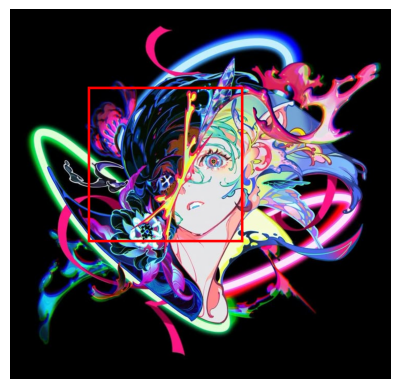

In [77]:
from PIL import ImageDraw

# Canvas
image_draw = nami_obj.copy()

# Pen
image_fn = ImageDraw.Draw(im=image_draw)

# Shape
shape = [left, upper, right, lower]

image_fn.rectangle(xy=shape, outline="red", width=5)
# outline="Red", witdh = 3
# fill="Red"

plt.imshow(image_draw)
plt.axis("off")
plt.show()

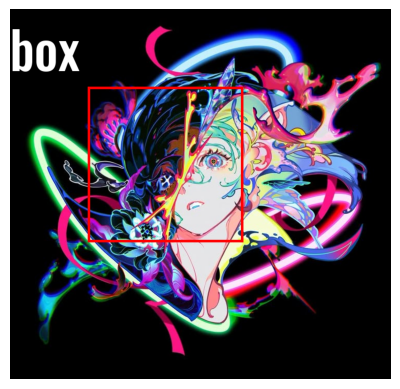

In [86]:
from PIL import ImageFont

direc = os.getcwd()
ifont = "Fonts_Storage/Oswald/static/Oswald-Medium.ttf"
fonts = f"{direc}/{ifont}"

fnt = ImageFont.truetype(fonts, 100)
image_fn.text(xy=(0,0), text='box', font=fnt, fill=(255,255,255))

plt.imshow(image_draw)
plt.axis("off")
plt.show()

### Superimposition

In [102]:
# Pillow

direc = os.getcwd()
iname1 = "image_1.png"
image1 = f"{direc}/Image_Storage/{iname1}"

robin_obj = Image.open(image1)
robin_pil = np.array(robin_obj)

robin_cv2 = cv2.imread(image1)

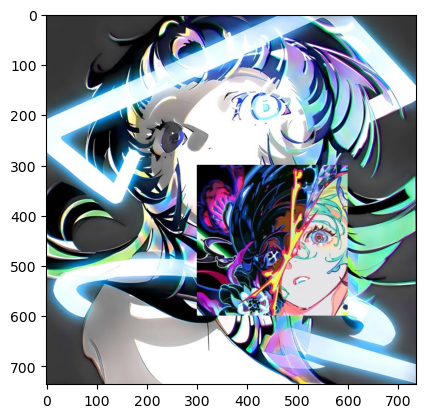

In [101]:
left = 300
upper = 300

robin_obj.paste(crop_nami, box=(left, upper))

plt.imshow(robin_obj)

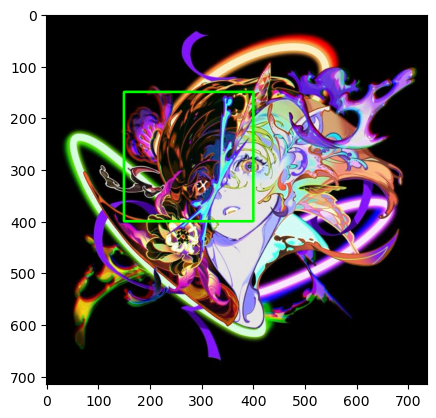

In [104]:
# OpenCV

nami_draw = np.copy(nami_cv2)

left = 150
upper = 150

right = 400
lower = 400

start_point, end_point=(left, upper), (right, lower)

cv2.rectangle(nami_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3)

plt.imshow(nami_draw)

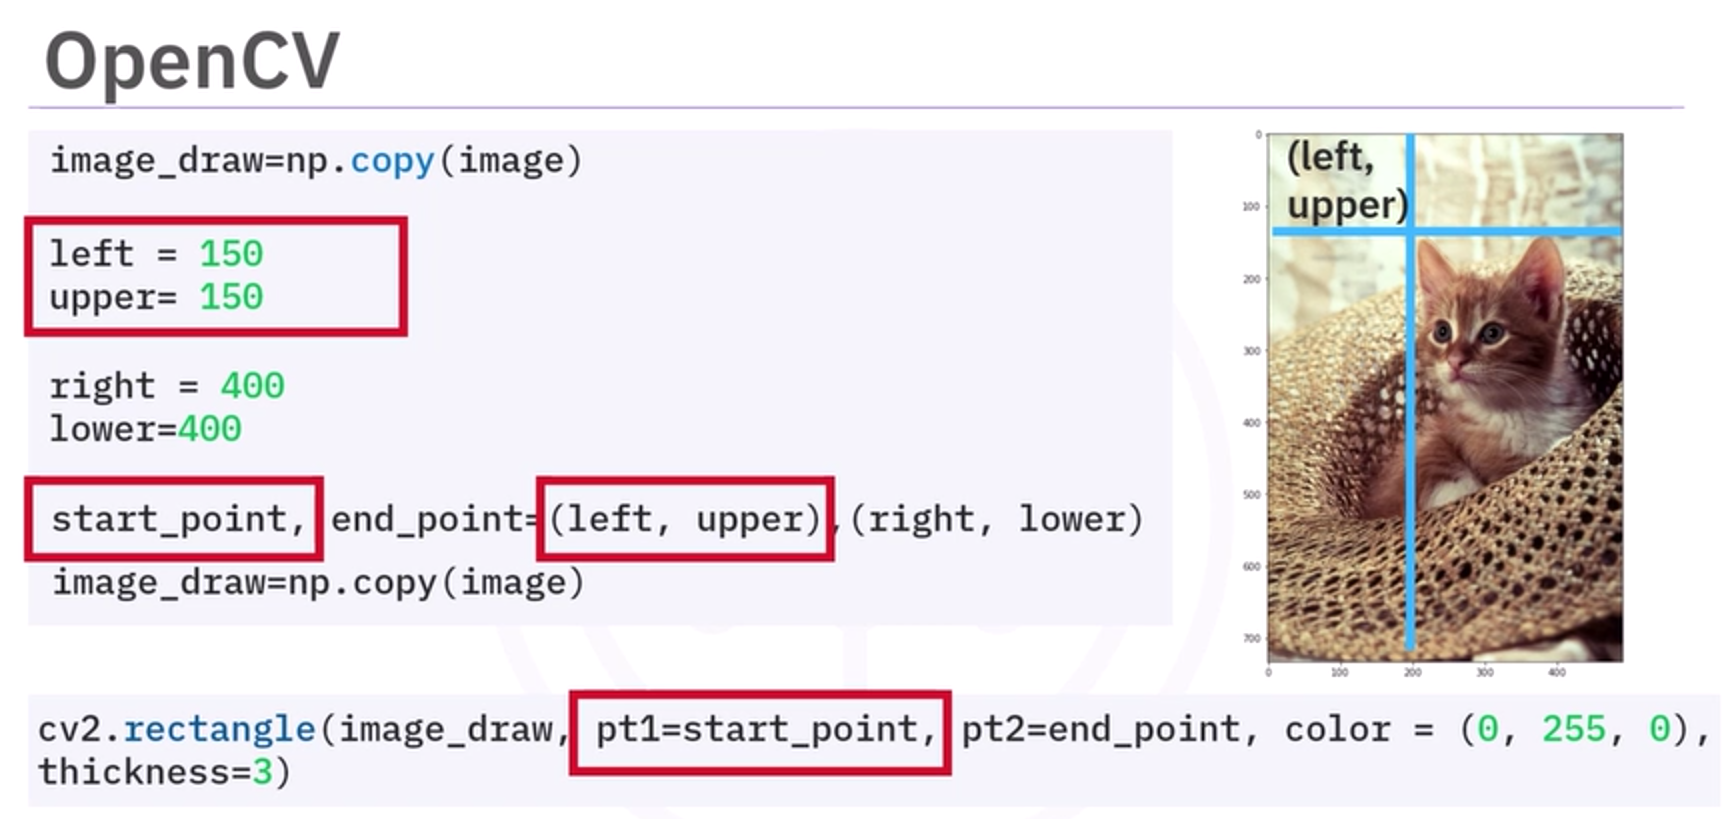
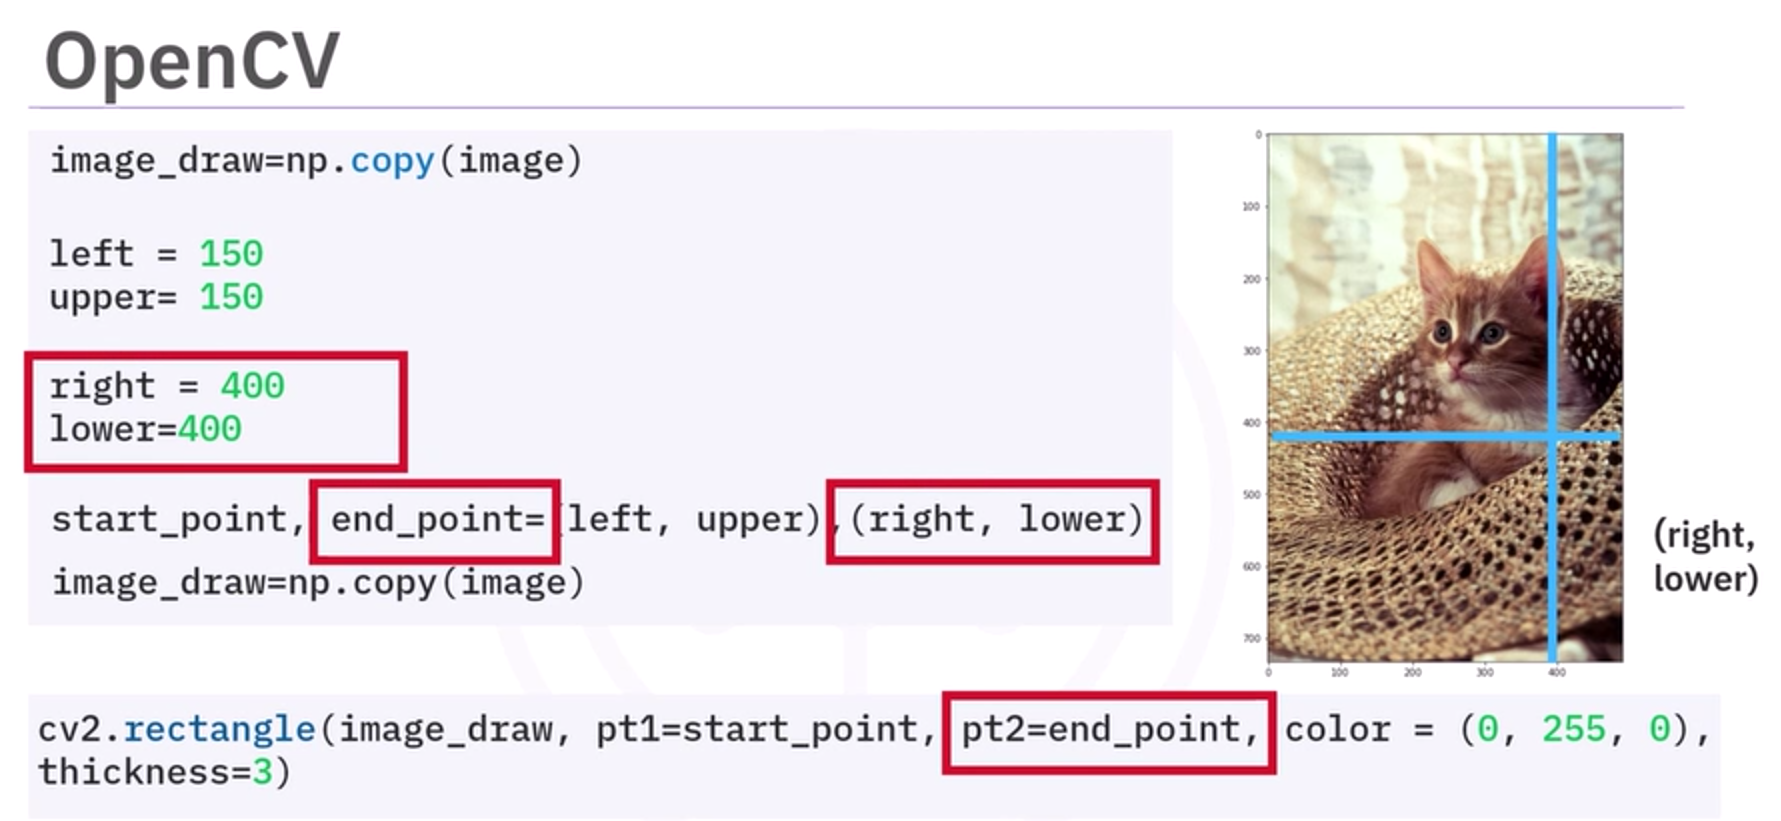
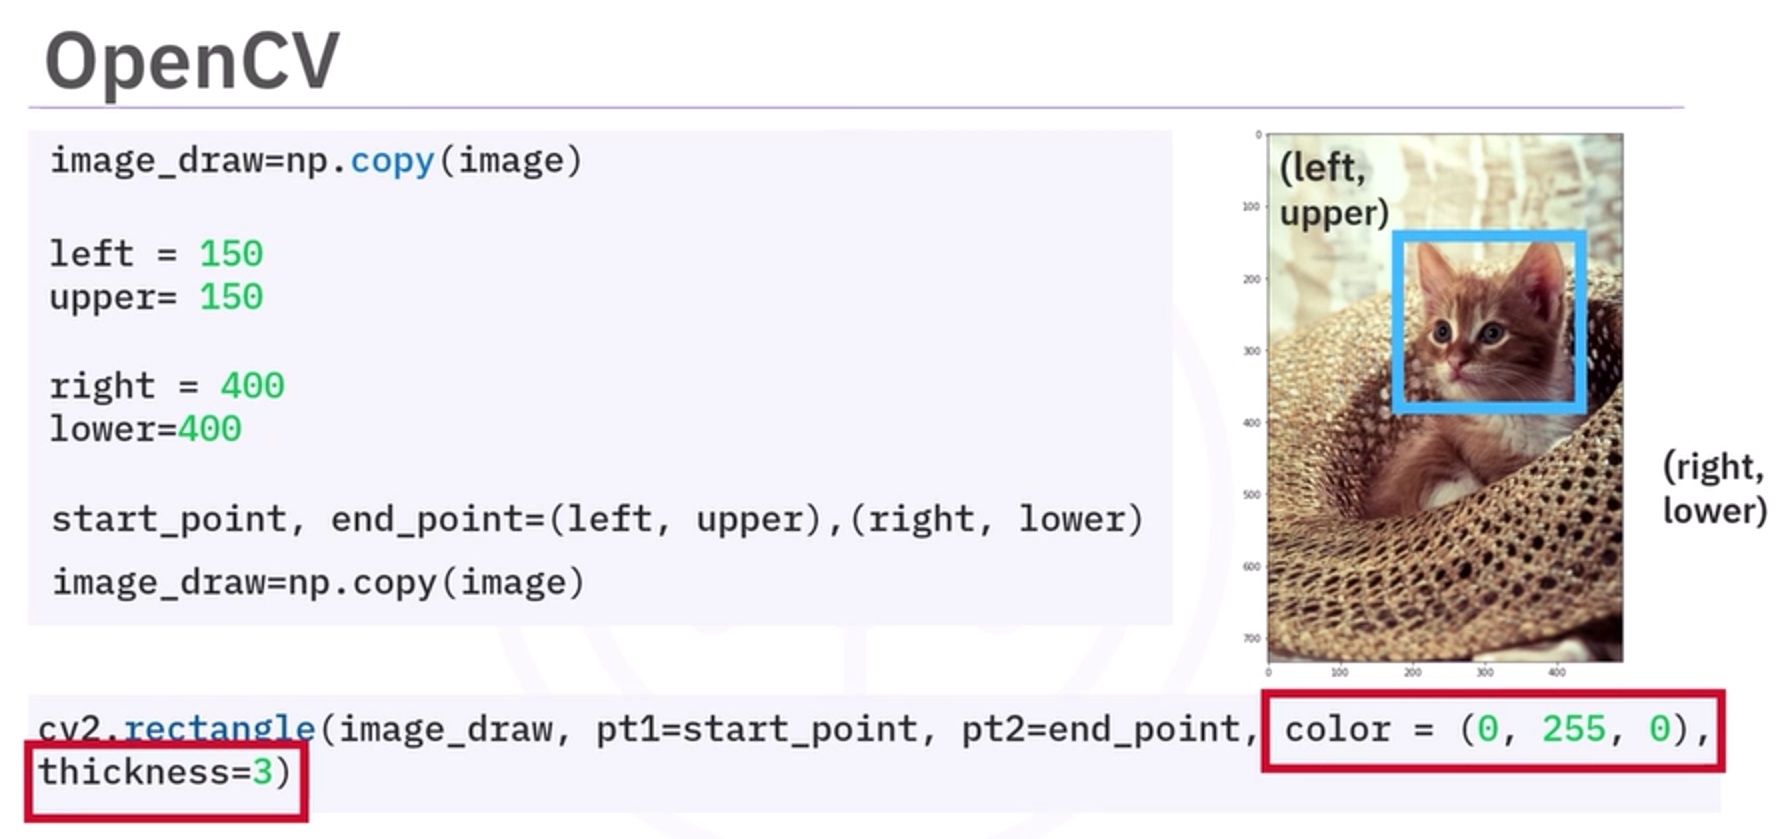

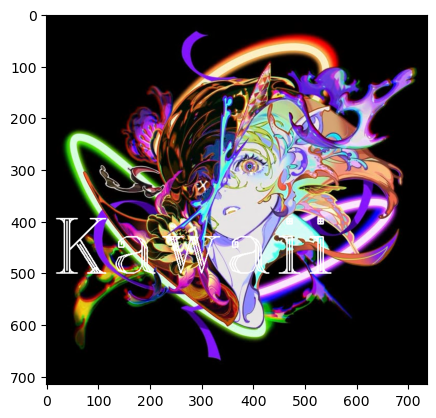

In [106]:
cv2.putText(img=nami_cv2, text='Kawaii', org=(10,500), color=(255,255,255), fontFace=4, fontScale=5, thickness=2)

plt.imshow(nami_cv2)

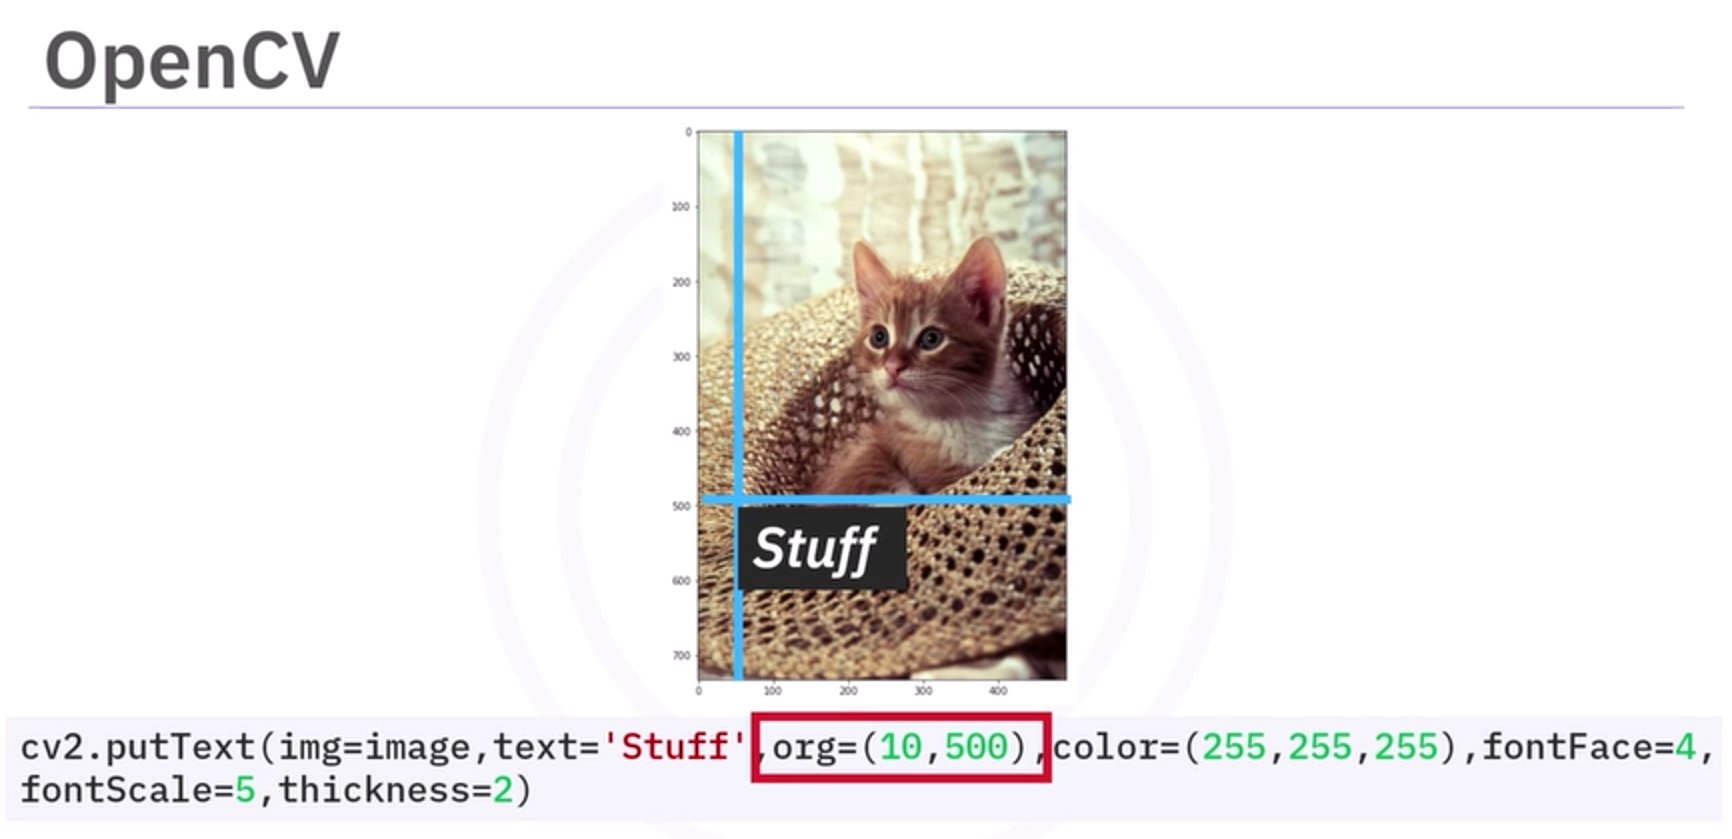